In [1]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 22.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [4]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [5]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [6]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [7]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [8]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

In [9]:
import spacy

In [10]:
nlp = spacy.load('el_core_news_sm')

In [11]:
in_full_articles_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/tempi-data-analysis/articles.csv/in_tempi_articles.csv")

In [12]:
in_full_articles_df

article_url  \
0    https://www.in.gr/2025/03/07/greece/tempi-mi-l...   
1    https://www.in.gr/2025/03/07/politics/politiki...   
2    https://www.in.gr/2025/03/07/politics/politiki...   
3    https://www.in.gr/2025/03/07/greece/tempi-dyo-...   
4    https://www.in.gr/2025/03/07/apopsi/diadilosei...   
..                                                 ...   
395  https://www.in.gr/2025/01/26/politics/politiki...   
396  https://www.in.gr/2025/01/26/politics/politiki...   
397  https://www.in.gr/2025/01/26/politics/politiki...   
398  https://www.in.gr/2025/01/26/greece/magda-fyss...   
399  https://www.in.gr/2025/01/26/politics/politiki...   

                                                 title        date      time  \
0    Τέμπη: Μη λησμονάτε – Συγκινητική παρέμβαση στ...  2025-03-07  21:07:00   
1    Τέμπη: Το δυστύχημα με το τρένο που θα μπορούσ...  2025-03-07  20:00:00   
2    Χαρίτσης: Τα Τέμπη ήταν ένα κρατικό έγκλημα όπ...  2025-03-07  19:10:00   
3    Τέμπη: Δύο χρόνια μετά την τραγωδία έκανε έρευ...  2025-03-07  18:13:00   
4               Διαδηλώσεις για τα Τέμπη: Κοινός τόπος  2025-03-07  18:04:00   
..                                                 ...         ...       ...   
395  ΣΥΡΙΖΑ: Ο Φάμελλος θα επιδιώξει συνεννόηση με ...  2025-01-26  19:28:00   
396  Κουτσούμπας από Σέρρες: Να αποκαλυφθούν οι υπε...  2025-01-26  18:44:00   
397  Χαρίτσης για Τέμπη: Σήμερα ζήσαμε κάτι συγκλον...  2025-01-26  18:18:00   
398  Μάγδα Φύσσα για Τέμπη: «Για μια στιγμή χάσαμε ...  2025-01-26  18:17:00   
399  Ανδρουλάκης για Τέμπη: Σήμερα οι Έλληνες δεν ζ...  2025-01-26  17:59:00   

                 section              author  \
0                 Ελλάδα             Σύνταξη   
1    Πολιτική Γραμματεία     Νατάσα Ρουγγέρη   
2    Πολιτική Γραμματεία             Σύνταξη   
3                 Ελλάδα             Σύνταξη   
4                Opinion  Παναγιώτης Σωτήρης   
..                   ...                 ...   
395  Πολιτική Γραμματεία             Σύνταξη   
396  Πολιτική Γραμματεία             Σύνταξη   
397  Πολιτική Γραμματεία             Σύνταξη   
398               Ελλάδα             Σύνταξη   
399  Πολιτική Γραμματεία             Σύνταξη   

                                               excerpt  \
0    Απηύθυναν μήνυμα από την κεντρική εξέδρα της ε...   
1    Ψηλά στην ειδησεογραφία των ξένων ΜΜΕ βρίσκετα...   
2    Ο Αλέξης Χαρίτσης ξεκίνησε την ομιλία του, ζητ...   
3    Τα έμπειρα στελέχη της Πυροσβεστικής βρέθηκαν ...   
4    Στις διαδηλώσεις για τα Τέμπη ανασυγκροτήθηκε ...   
..                                                 ...   
395  Ο πρόεδρος του ΣΥΡΙΖΑ - ΠΣ Σωκράτης Φάμελλος θ...   
396  Ο Δημήτρης Κουτσούμπας παρευρέθηκε στη συγκέντ...   
397  «Είναι αυτό που στην ιστορία χαρακτηρίζουμε το...   
398  Αδυνατώντας να συγκρατήσει τα συναισθήματά της...   
399  Ο Νίκος Ανδρουλάκης ανήρτησε στα μέσα κοινωνικ...   

                                             text_body  \
0    Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...   
1    Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...   
2    «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...   
3    Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...   
4    Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...   
..                                                 ...   
395  Συνεννόηση με τα προοδευτικά κόμματα της αντιπ...   
396  Στη μαζική συγκέντρωση για τη σιδηροδρομική τρ...   
397  Μήνυμα μετά το τέλος της μεγαλειώδους συγκέντρ...   
398  Η Μάγδα Φύσσα, μητέρα του Παύλου Φύσσα, του νε...   
399  Σήμερα οι Έλληνες δεν ζήτησαν απλά Δικαιοσύνη....   

                                         feat_img_link  \
0    https://www.in.gr/wp-content/uploads/2025/03/E...   
1    https://www.in.gr/wp-content/uploads/2025/03/4...   
2    https://www.in.gr/wp-content/uploads/2025/03/4...   
3    https://www.in.gr/wp-content/uploads/2025/03/6...   
4    https://www.in.gr/wp-content/uploads/2025/03/I...   
..                                                 ...   
395  htt

In [13]:
in_full_articles_df=in_full_articles_df.drop_duplicates()
in_full_articles_df=in_full_articles_df.dropna()
in_full_articles_df

article_url  \
0    https://www.in.gr/2025/03/07/greece/tempi-mi-l...   
1    https://www.in.gr/2025/03/07/politics/politiki...   
2    https://www.in.gr/2025/03/07/politics/politiki...   
3    https://www.in.gr/2025/03/07/greece/tempi-dyo-...   
4    https://www.in.gr/2025/03/07/apopsi/diadilosei...   
..                                                 ...   
395  https://www.in.gr/2025/01/26/politics/politiki...   
396  https://www.in.gr/2025/01/26/politics/politiki...   
397  https://www.in.gr/2025/01/26/politics/politiki...   
398  https://www.in.gr/2025/01/26/greece/magda-fyss...   
399  https://www.in.gr/2025/01/26/politics/politiki...   

                                                 title        date      time  \
0    Τέμπη: Μη λησμονάτε – Συγκινητική παρέμβαση στ...  2025-03-07  21:07:00   
1    Τέμπη: Το δυστύχημα με το τρένο που θα μπορούσ...  2025-03-07  20:00:00   
2    Χαρίτσης: Τα Τέμπη ήταν ένα κρατικό έγκλημα όπ...  2025-03-07  19:10:00   
3    Τέμπη: Δύο χρόνια μετά την τραγωδία έκανε έρευ...  2025-03-07  18:13:00   
4               Διαδηλώσεις για τα Τέμπη: Κοινός τόπος  2025-03-07  18:04:00   
..                                                 ...         ...       ...   
395  ΣΥΡΙΖΑ: Ο Φάμελλος θα επιδιώξει συνεννόηση με ...  2025-01-26  19:28:00   
396  Κουτσούμπας από Σέρρες: Να αποκαλυφθούν οι υπε...  2025-01-26  18:44:00   
397  Χαρίτσης για Τέμπη: Σήμερα ζήσαμε κάτι συγκλον...  2025-01-26  18:18:00   
398  Μάγδα Φύσσα για Τέμπη: «Για μια στιγμή χάσαμε ...  2025-01-26  18:17:00   
399  Ανδρουλάκης για Τέμπη: Σήμερα οι Έλληνες δεν ζ...  2025-01-26  17:59:00   

                 section              author  \
0                 Ελλάδα             Σύνταξη   
1    Πολιτική Γραμματεία     Νατάσα Ρουγγέρη   
2    Πολιτική Γραμματεία             Σύνταξη   
3                 Ελλάδα             Σύνταξη   
4                Opinion  Παναγιώτης Σωτήρης   
..                   ...                 ...   
395  Πολιτική Γραμματεία             Σύνταξη   
396  Πολιτική Γραμματεία             Σύνταξη   
397  Πολιτική Γραμματεία             Σύνταξη   
398               Ελλάδα             Σύνταξη   
399  Πολιτική Γραμματεία             Σύνταξη   

                                               excerpt  \
0    Απηύθυναν μήνυμα από την κεντρική εξέδρα της ε...   
1    Ψηλά στην ειδησεογραφία των ξένων ΜΜΕ βρίσκετα...   
2    Ο Αλέξης Χαρίτσης ξεκίνησε την ομιλία του, ζητ...   
3    Τα έμπειρα στελέχη της Πυροσβεστικής βρέθηκαν ...   
4    Στις διαδηλώσεις για τα Τέμπη ανασυγκροτήθηκε ...   
..                                                 ...   
395  Ο πρόεδρος του ΣΥΡΙΖΑ - ΠΣ Σωκράτης Φάμελλος θ...   
396  Ο Δημήτρης Κουτσούμπας παρευρέθηκε στη συγκέντ...   
397  «Είναι αυτό που στην ιστορία χαρακτηρίζουμε το...   
398  Αδυνατώντας να συγκρατήσει τα συναισθήματά της...   
399  Ο Νίκος Ανδρουλάκης ανήρτησε στα μέσα κοινωνικ...   

                                             text_body  \
0    Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...   
1    Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...   
2    «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...   
3    Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...   
4    Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...   
..                                                 ...   
395  Συνεννόηση με τα προοδευτικά κόμματα της αντιπ...   
396  Στη μαζική συγκέντρωση για τη σιδηροδρομική τρ...   
397  Μήνυμα μετά το τέλος της μεγαλειώδους συγκέντρ...   
398  Η Μάγδα Φύσσα, μητέρα του Παύλου Φύσσα, του νε...   
399  Σήμερα οι Έλληνες δεν ζήτησαν απλά Δικαιοσύνη....   

                                         feat_img_link  \
0    https://www.in.gr/wp-content/uploads/2025/03/E...   
1    https://www.in.gr/wp-content/uploads/2025/03/4...   
2    https://www.in.gr/wp-content/uploads/2025/03/4...   
3    https://www.in.gr/wp-content/uploads/2025/03/6...   
4    https://www.in.gr/wp-content/uploads/2025/03/I...   
..                                                 ...   
395  htt

In [14]:
len(in_full_articles_df)

391

In [15]:
in_full_articles_df.head()

article_url  \
0  https://www.in.gr/2025/03/07/greece/tempi-mi-l...   
1  https://www.in.gr/2025/03/07/politics/politiki...   
2  https://www.in.gr/2025/03/07/politics/politiki...   
3  https://www.in.gr/2025/03/07/greece/tempi-dyo-...   
4  https://www.in.gr/2025/03/07/apopsi/diadilosei...   

                                               title        date      time  \
0  Τέμπη: Μη λησμονάτε – Συγκινητική παρέμβαση στ...  2025-03-07  21:07:00   
1  Τέμπη: Το δυστύχημα με το τρένο που θα μπορούσ...  2025-03-07  20:00:00   
2  Χαρίτσης: Τα Τέμπη ήταν ένα κρατικό έγκλημα όπ...  2025-03-07  19:10:00   
3  Τέμπη: Δύο χρόνια μετά την τραγωδία έκανε έρευ...  2025-03-07  18:13:00   
4             Διαδηλώσεις για τα Τέμπη: Κοινός τόπος  2025-03-07  18:04:00   

               section              author  \
0               Ελλάδα             Σύνταξη   
1  Πολιτική Γραμματεία     Νατάσα Ρουγγέρη   
2  Πολιτική Γραμματεία             Σύνταξη   
3               Ελλάδα             Σύνταξη   
4              Opinion  Παναγιώτης Σωτήρης   

                                             excerpt  \
0  Απηύθυναν μήνυμα από την κεντρική εξέδρα της ε...   
1  Ψηλά στην ειδησεογραφία των ξένων ΜΜΕ βρίσκετα...   
2  Ο Αλέξης Χαρίτσης ξεκίνησε την ομιλία του, ζητ...   
3  Τα έμπειρα στελέχη της Πυροσβεστικής βρέθηκαν ...   
4  Στις διαδηλώσεις για τα Τέμπη ανασυγκροτήθηκε ...   

                                           text_body  \
0  Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...   
1  Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...   
2  «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...   
3  Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...   
4  Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...   

                                       feat_img_link  \
0  https://www.in.gr/wp-content/uploads/2025/03/E...   
1  https://www.in.gr/wp-content/uploads/2025/03/4...   
2  https://www.in.gr/wp-content/uploads/2025/03/4...   
3  https://www.in.gr/wp-content/uploads/2025/03/6...   
4  https://www.in.gr/wp-content/uploads/2025/03/I...   

                                    feat_img_caption  
0  Τέμπη: Μη λησμονάτε – Συγκινητική παρέμβαση στ...  
1  Τέμπη: Το δυστύχημα με το τρένο που θα μπορούσ...  
2  Χαρίτσης: Τα Τέμπη ήταν ένα κρατικό έγκλημα όπ...  
3  Τέμπη: Δύο χρόνια μετά την τραγωδία έκανε έρευ...  
4             Διαδηλώσεις για τα Τέμπη: Κοινός τόπος

In [16]:
short_in_fa_df = in_full_articles_df[['date','text_body' ]]
short_in_fa_df = short_in_fa_df.rename(columns={'text_body': 'text'} )
short_in_fa_df["site"]="in"
short_in_fa_df.drop_duplicates(inplace=True)
short_in_fa_df

date                                               text site
0    2025-03-07  Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...   in
1    2025-03-07  Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...   in
2    2025-03-07  «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...   in
3    2025-03-07  Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...   in
4    2025-03-07  Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...   in
..          ...                                                ...  ...
395  2025-01-26  Συνεννόηση με τα προοδευτικά κόμματα της αντιπ...   in
396  2025-01-26  Στη μαζική συγκέντρωση για τη σιδηροδρομική τρ...   in
397  2025-01-26  Μήνυμα μετά το τέλος της μεγαλειώδους συγκέντρ...   in
398  2025-01-26  Η Μάγδα Φύσσα, μητέρα του Παύλου Φύσσα, του νε...   in
399  2025-01-26  Σήμερα οι Έλληνες δεν ζήτησαν απλά Δικαιοσύνη....   in

[391 rows x 3 columns]

In [17]:
short_in_fa_df.to_csv('short_in_fa.csv', index=False)

In [18]:
from google.colab import files
files.download('short_in_fa.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
short_in_fa_df.tail()

date                                               text site
395  2025-01-26  Συνεννόηση με τα προοδευτικά κόμματα της αντιπ...   in
396  2025-01-26  Στη μαζική συγκέντρωση για τη σιδηροδρομική τρ...   in
397  2025-01-26  Μήνυμα μετά το τέλος της μεγαλειώδους συγκέντρ...   in
398  2025-01-26  Η Μάγδα Φύσσα, μητέρα του Παύλου Φύσσα, του νε...   in
399  2025-01-26  Σήμερα οι Έλληνες δεν ζήτησαν απλά Δικαιοσύνη....   in

In [20]:
short_in_fa_df['date'] = pd.to_datetime(short_in_fa_df['date'], format='%Y-%m-%d')

In [21]:
short_in_fa_df.dtypes

date    datetime64[ns]
text            object
site            object
dtype: object

In [22]:
short_in_fa_df['text'] = short_in_fa_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

In [23]:
short_in_fa_df.head()

date                                               text site
0 2025-03-07  Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...   in
1 2025-03-07  Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...   in
2 2025-03-07  «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...   in
3 2025-03-07  Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...   in
4 2025-03-07  Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...   in

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import seaborn as sns

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv = CountVectorizer()

In [32]:
count_vector = cv.fit_transform(short_in_fa_df['text'])

In [33]:
count_vector.shape

(391, 18839)

In [24]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [35]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [37]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_in_fa_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

28 φεβρουαρίου  hellenic train  έγκλημα τεμπών  δυστύχημα τέμπη  \
0               0               0               0                0   
1               0               0               0                0   
2               0               0               0                0   
3               0               0               0                0   
4               0               0               0                0   

   δύο χρόνια  εμπορική αμαξοστοιχία  εμπορικής αμαξοστοιχίας  εφέτη ανακριτή  \
0           0                      0                        0               0   
1           1                      2                        0               0   
2           0                      1                        0               0   
3           2                      0                        2               1   
4           0                      0                        0               0   

   κυριάκος μητσοτάκης  πασοκ κιναλ  προανακριτικής επιτροπής  \
0                    0            0                         0   
1                    1            0                         0   
2                    0            0                         0   
3                    0            0                         0   
4                    0            0                         0   

   πρόταση δυσπιστίας  σιδηροδρομική τραγωδία  σιδηροδρομικό δυστύχημα  \
0                   0                       0                        0   
1                   1                       0                        0   
2                   3                       0                        0   
3                   0                       0                        0   
4                   0                       0                        0   

   συγγενείς θυμάτων  σύσταση προανακριτικής  τραγωδία τέμπη  τραγωδία τεμπών  \
0                  0                       0               1                2   
1                  1                       0               1                1   
2                  0                       0               0                0   
3                  0                       0               0                1   
4                  0                       0               1                0   

   τραγωδίας τέμπη  τραγωδίας τεμπών  
0                1                 0  
1                0                 0  
2                0                 0  
3                0                 0  
4                0                 0

In [39]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['αντιπολίτευση', 'κυβέρνηση', 'έγκλημα', 'συγκάλυψη', 'θύματα', 'δυστύχημα', 'σταθμάρχης','δικαιοσύνη', 'εμπιστοσύνη', 'Βουλή', 'βία'])
count_vector = cv.fit_transform(short_in_fa_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:1368: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


αντιπολίτευση  κυβέρνηση  έγκλημα  συγκάλυψη  θύματα  δυστύχημα  \
0                0          0        0          0       1          0   
1                0          8        0          1       0          5   
2                0          3        2          0       0          0   
3                0          0        0          0       0          0   
4                0          0        0          1       1          0   
..             ...        ...      ...        ...     ...        ...   
386              0          0        2          0       0          0   
387              0          1        3          0       0          0   
388              0          0        0          4       1          0   
389              0          0        0          1       0          3   
390              1          2        0          0       0          0   

     σταθμάρχης  δικαιοσύνη  εμπιστοσύνη  Βουλή  βία  
0             0           5            0      0    0  
1             0           1            0      0    0  
2             0           0            2      0    0  
3             0           0            0      0    0  
4             0           2            0      0    0  
..          ...         ...          ...    ...  ...  
386           0           1            0      0    0  
387           0           0            0      0    0  
388           0           2            0      0    0  
389           0           0            0      0    0  
390           0           5            0      0    1  

[391 rows x 11 columns]

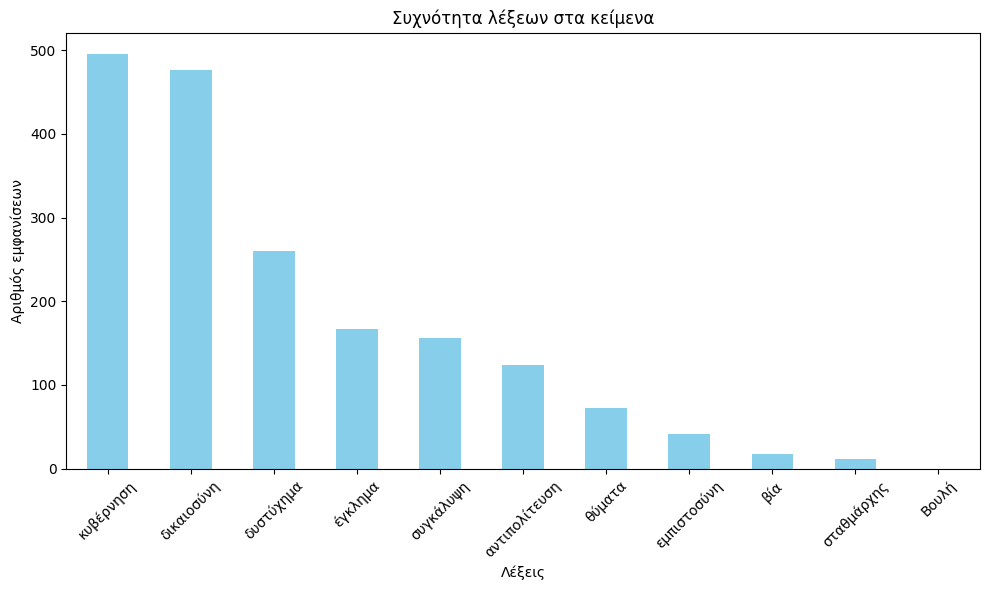

In [40]:
import matplotlib.pyplot as plt

# Υπολογίζουμε τη συνολική συχνότητα κάθε λέξης σε όλα τα κείμενα
word_counts = results.sum().sort_values(ascending=False)

# Φτιάχνουμε το γράφημα
plt.figure(figsize=(10, 6))
word_counts.plot(kind='bar', color='skyblue')
plt.title('Συχνότητα λέξεων στα κείμενα')
plt.ylabel('Αριθμός εμφανίσεων')
plt.xlabel('Λέξεις')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  008473  01  012  02  022  0220295  023  0230024  ...  ώρας  ώρες  \
0   0    0       0   0    0   0    0        0    0        0  ...     0     0   
1   0    0       0   0    0   0    0        0    0        0  ...     0     0   
2   0    0       0   0    0   0    0        0    0        0  ...     0     0   
3   1    0       0   0    0   0    0        0    0        0  ...     0     1   
4   0    0       0   0    0   0    0        0    0        0  ...     0     0   

   ώριμα  ώσμωση  ώστε  ᴀʀɪꜱᴛᴏᴛᴇʟᴇꜱ  ἐπιμέλειαν  𝔻𝕚  𝔼𝕝𝕝𝕚  𝕁𝕠  
0      0       0     0            0           0   0     0   0  
1      0       0     0            0           0   0     0   0  
2      0       0     0            0           0   0     0   0  
3      0       0     1            0           0   0     0   0  
4      0       0     0            0           0   0     0   0  

[5 rows x 18839 columns]

In [25]:
matrix = vec.fit_transform(short_in_fa_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    1     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [26]:
wordcount_df.shape

(391, 13161)

In [27]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [ ]:
wordcount_df.tail(1)

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
390      0                0        0    0     0      0     0             0   

     αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
390     0       0  ...                 0               0      0        0   

     κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
390          0          0             0         0        0     0  

[1 rows x 13161 columns]

In [ ]:
wordcount_df[trust_words].tail(1)

αμην  γαμηλιο ταξιδι  διευθυντρια σχολειου  επικοινωνω  εκκλησια  \
390     0               0                     0           0         0   

     εν τω μεταξυ  ευαγγελιο  κυριε  λιστα ελεγχου  λυρικη σκηνη  ...  \
390             0          0      0              0             0  ...   

     ηλιακο ωρολογιο  συνεργιστικος  διπλο ποδηλατο  ισαξιος  ανακωχη  αληθης  \
390                0              0               0        0        0       0   

     αναμφιβολως  ανυπερβατος  αναθηματικος  αποδειξη πληρωμης  
390            0            0             0                  0  

[1 rows x 1259 columns]

In [ ]:
wordcount_df[trust_words].sum(axis=1)

0       7
1      27
2      17
3      13
4       8
       ..
386     1
387     2
388     8
389     6
390    18
Length: 391, dtype: int64

In [ ]:
short_in_fa_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_in_fa_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_in_fa_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_in_fa_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_in_fa_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_in_fa_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_in_fa_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_in_fa_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_in_fa_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_in_fa_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_in_fa_df

date                                               text  anger  \
0   2025-03-07  Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...    3.0   
1   2025-03-07  Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...   21.0   
2   2025-03-07  «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...   10.0   
3   2025-03-07  Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...   10.0   
4   2025-03-07  Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...    4.0   
..         ...                                                ...    ...   
395 2025-01-26  Συνεννόηση με τα προοδευτικά κόμματα της αντιπ...    NaN   
396 2025-01-26  Στη μαζική συγκέντρωση για τη σιδηροδρομική τρ...    NaN   
397 2025-01-26  Μήνυμα μετά το τέλος της μεγαλειώδους συγκέντρ...    NaN   
398 2025-01-26  Η Μάγδα Φύσσα, μητέρα του Παύλου Φύσσα, του νε...    NaN   
399 2025-01-26  Σήμερα οι Έλληνες δεν ζήτησαν απλά Δικαιοσύνη....    NaN   

     positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0         8.0  2.0      0.0       0.0    7.0           2.0      7.0       7.0   
1        33.0  5.0      9.0      14.0   27.0           7.0     18.0      44.0   
2        21.0  1.0      5.0       1.0   17.0           5.0      6.0      17.0   
3        23.0  1.0     10.0       6.0   13.0          10.0      8.0      20.0   
4         6.0  1.0      1.0       3.0    8.0           5.0      5.0       8.0   
..        ...  ...      ...       ...    ...           ...      ...       ...   
395       NaN  NaN      NaN       NaN    NaN           NaN      NaN       NaN   
396       NaN  NaN      NaN       NaN    NaN           NaN      NaN       NaN   
397       NaN  NaN      NaN       NaN    NaN           NaN      NaN       NaN   
398       NaN  NaN      NaN       NaN    NaN           NaN      NaN       NaN   
399       NaN  NaN      NaN       NaN    NaN           NaN      NaN       NaN   

     fear  
0     5.0  
1    33.0  
2    12.0  
3    17.0  
4     4.0  
..    ...  
395   NaN  
396   NaN  
397   NaN  
398   NaN  
399   NaN  

[391 rows x 12 columns]

In [ ]:
short_in_fa_df.dropna(inplace=True)
short_in_fa_df

date                                               text  anger  \
0   2025-03-07  Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...    3.0   
1   2025-03-07  Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...   21.0   
2   2025-03-07  «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...   10.0   
3   2025-03-07  Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...   10.0   
4   2025-03-07  Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...    4.0   
..         ...                                                ...    ...   
386 2025-01-27  Από νωρίς το μεσημέρι τη Κυριακής, όταν άρχισε...    9.0   
387 2025-01-27  Με κεντρικό σύνθημα «δεν έχω οξυγόνο» ιστορικέ...    8.0   
388 2025-01-26  Κατά της διοίκησης της ΕΡΤ στρέφεται με ανακοί...    9.0   
389 2025-01-26  Οι μεγαλειώδεις διαδηλώσεις για το έγκλημα στα...   10.0   
390 2025-01-26  Η πρόταση του πρόεδρου του ΣΥΡΙΖΑ – Προοδευτικ...   12.0   

     positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0         8.0  2.0      0.0       0.0    7.0           2.0      7.0       7.0   
1        33.0  5.0      9.0      14.0   27.0           7.0     18.0      44.0   
2        21.0  1.0      5.0       1.0   17.0           5.0      6.0      17.0   
3        23.0  1.0     10.0       6.0   13.0          10.0      8.0      20.0   
4         6.0  1.0      1.0       3.0    8.0           5.0      5.0       8.0   
..        ...  ...      ...       ...    ...           ...      ...       ...   
386       7.0  0.0      2.0       0.0    1.0           3.0      0.0       9.0   
387       7.0  3.0      1.0       5.0    2.0           5.0      4.0      11.0   
388       9.0  2.0      1.0       2.0    8.0           4.0      3.0      12.0   
389       8.0  2.0      3.0       6.0    6.0           6.0     10.0      15.0   
390      17.0  6.0      6.0       5.0   18.0          11.0     14.0      23.0   

     fear  
0     5.0  
1    33.0  
2    12.0  
3    17.0  
4     4.0  
..    ...  
386   1.0  
387   9.0  
388   6.0  
389  10.0  
390  15.0  

[382 rows x 12 columns]

In [ ]:
short_in_fa_df.reset_index(inplace=True)
short_in_fa_df.set_index('date', inplace=True)
short_in_fa_df

index                                               text  anger  \
date                                                                          
2025-03-07      0  Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...    3.0   
2025-03-07      1  Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...   21.0   
2025-03-07      2  «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...   10.0   
2025-03-07      3  Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...   10.0   
2025-03-07      4  Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...    4.0   
...           ...                                                ...    ...   
2025-01-27    386  Από νωρίς το μεσημέρι τη Κυριακής, όταν άρχισε...    9.0   
2025-01-27    387  Με κεντρικό σύνθημα «δεν έχω οξυγόνο» ιστορικέ...    8.0   
2025-01-26    388  Κατά της διοίκησης της ΕΡΤ στρέφεται με ανακοί...    9.0   
2025-01-26    389  Οι μεγαλειώδεις διαδηλώσεις για το έγκλημα στα...   10.0   
2025-01-26    390  Η πρόταση του πρόεδρου του ΣΥΡΙΖΑ – Προοδευτικ...   12.0   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2025-03-07       8.0  2.0      0.0       0.0    7.0           2.0      7.0   
2025-03-07      33.0  5.0      9.0      14.0   27.0           7.0     18.0   
2025-03-07      21.0  1.0      5.0       1.0   17.0           5.0      6.0   
2025-03-07      23.0  1.0     10.0       6.0   13.0          10.0      8.0   
2025-03-07       6.0  1.0      1.0       3.0    8.0           5.0      5.0   
...              ...  ...      ...       ...    ...           ...      ...   
2025-01-27       7.0  0.0      2.0       0.0    1.0           3.0      0.0   
2025-01-27       7.0  3.0      1.0       5.0    2.0           5.0      4.0   
2025-01-26       9.0  2.0      1.0       2.0    8.0           4.0      3.0   
2025-01-26       8.0  2.0      3.0       6.0    6.0           6.0     10.0   
2025-01-26      17.0  6.0      6.0       5.0   18.0          11.0     14.0   

            negative  fear  
date                        
2025-03-07       7.0   5.0  
2025-03-07      44.0  33.0  
2025-03-07      17.0  12.0  
2025-03-07      20.0  17.0  
2025-03-07       8.0   4.0  
...              ...   ...  
2025-01-27       9.0   1.0  
2025-01-27      11.0   9.0  
2025-01-26      12.0   6.0  
2025-01-26      15.0  10.0  
2025-01-26      23.0  15.0  

[382 rows x 12 columns]

In [ ]:
short_in_fa_df['text'].str.len().groupby(by=short_in_fa_df.index.day).mean().plot()

<Axes: xlabel='date'>

<Axes: xlabel='date'>

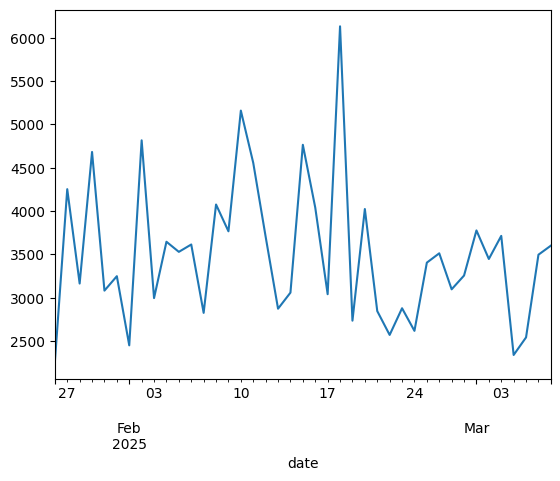

In [ ]:
short_in_fa_df['text'].str.len().resample('D').mean().plot()

<Axes: ylabel='date'>

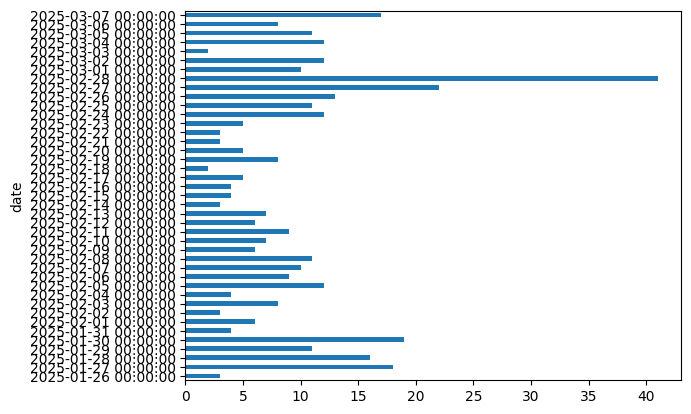

In [ ]:
short_in_fa_df['text'].resample('D').count().plot(kind='barh')

<Axes: xlabel='date'>

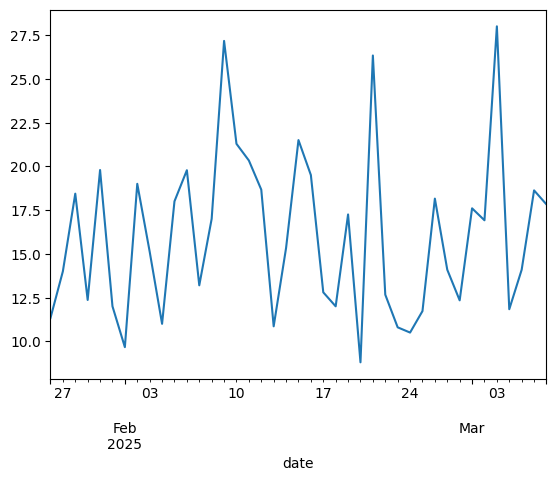

In [ ]:
short_in_fa_df['positive'].resample('D').mean().plot()

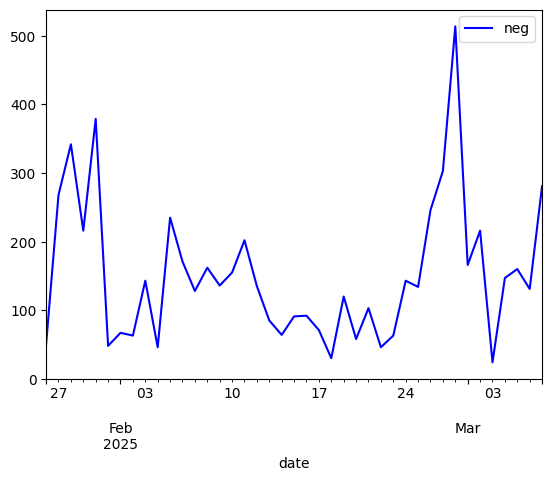

In [ ]:
short_in_fa_df['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='date'>

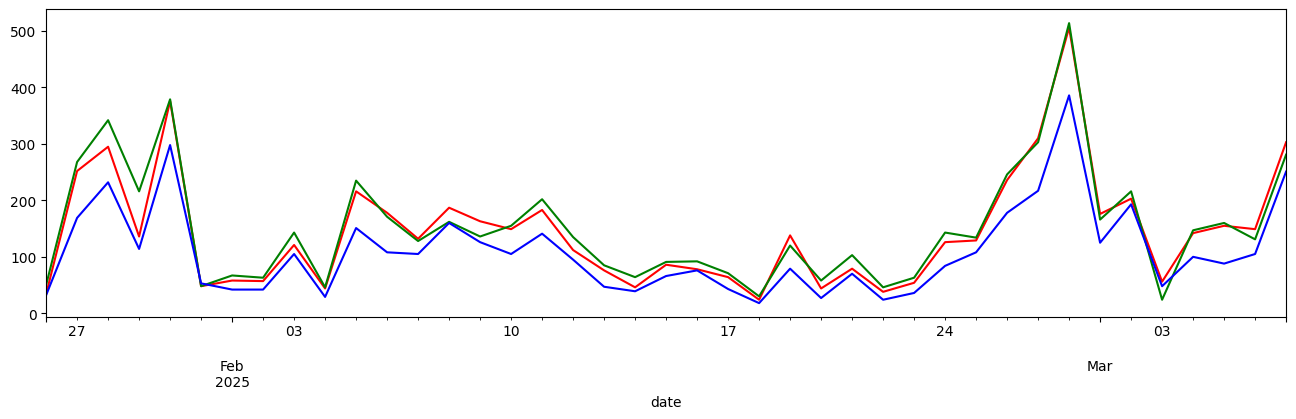

In [ ]:
ax = short_in_fa_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_in_fa_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_in_fa_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
plt.style.use('seaborn-v0_8-bright')

In [ ]:
ax = short_in_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_in_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_in_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_in_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_in_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [ ]:
plt.style.use('ggplot')

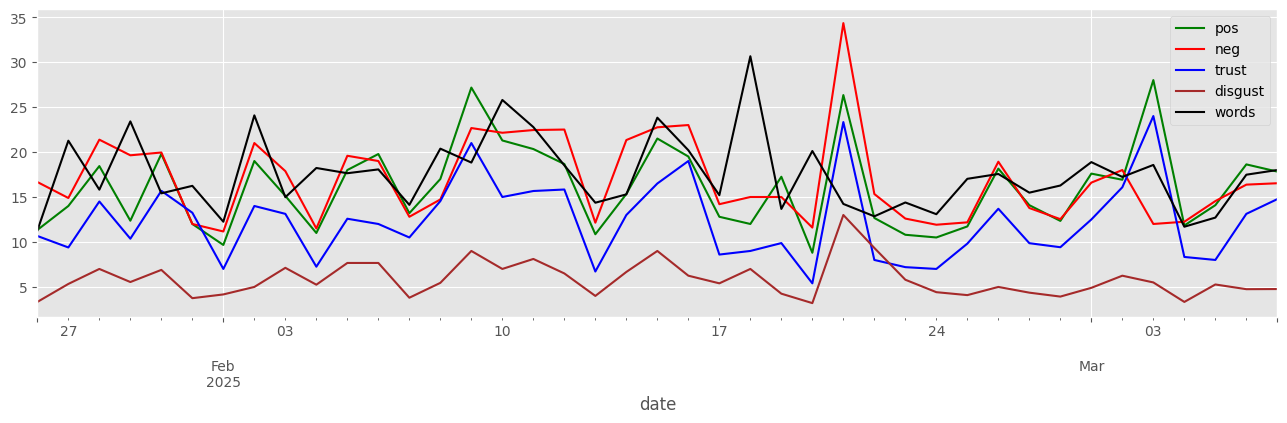

In [ ]:
ax = short_in_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_in_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_in_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_in_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_in_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [ ]:
plt.style.use('classic')

In [ ]:
ax = short_in_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_in_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_in_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_in_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_in_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

In [ ]:
short_in_fa_df['(-)αρνητικότητα | θετικότητα(+)'] = short_in_fa_df.positive*100//short_in_fa_df[['positive','negative']].sum(
        axis=1) - short_in_fa_df.negative*100//short_in_fa_df[['positive','negative']].sum(axis=1)

short_in_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_in_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(20,4))

<Axes: xlabel='date'>

In [ ]:
short_in_fa_df[(short_in_fa_df['(-)αρνητικότητα | θετικότητα(+)'] == short_in_fa_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_in_fa_df['(-)αρνητικότητα | θετικότητα(+)'] == short_in_fa_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

index  positive  negative  (-)αρνητικότητα | θετικότητα(+)
date                                                                  
2025-03-07      8       4.0       0.0                            100.0
2025-02-28     86       0.0       1.0                           -100.0
2025-02-28     98       0.0       4.0                           -100.0
2025-02-25    154       8.0       0.0                            100.0
2025-01-31    322       0.0       2.0                           -100.0
2025-01-27    385       0.0       2.0                           -100.0

In [ ]:
in_full_articles_df.loc[[86,98,322,385], ['article_url','title', 'text_body']]

article_url  \
86   https://www.in.gr/2025/02/28/greece/tempi-oli-...   
98   https://www.in.gr/2025/02/28/greece/tempi-eina...   
322  https://www.in.gr/2025/01/31/politics/politiki...   
385  https://www.in.gr/2025/01/27/politics/politiki...   

                                                 title  \
86            Τέμπη: Ολη η Ελλάδα ένα ανθρώπινο ποτάμι   
98   Τέμπη: «Είναι η πρώτη φορά που παίρνουμε πίσω ...   
322  Μητσοτάκης: Η Δικαιοσύνη θα αποφασίσει για τα ...   
385  Χρηστίδης: Η μοναδική πολιτική δύναμη η οποία ...   

                                             text_body  
86   Από το Σουφλί μέχρι την Γαύδο εκατοντάδες χιλι...  
98   Ανατριχιαστική ήταν η ομιλία της νεαρής κοπέλα...  
322  Σε εξέλιξη βρίσκεται η συνεδρίαση του Υπουργικ...  
385  Η μοναδική πολιτική δύναμη η οποία κομματικοπο...

In [ ]:
in_full_articles_df.loc[[8,154], ['article_url','title', 'text_body']]

article_url  \
8    https://www.in.gr/2025/03/07/inview/thessaloni...   
154  https://www.in.gr/2025/02/25/politics/politiki...   

                                                 title  \
8    Θεσσαλονίκη: Μαθητές και φοιτητές στους δρόμου...   
154  Τέμπη: Χαμηλώνουν τους τόνους Πιερρακάκης και ...   

                                             text_body  
8    Ραντεβού στο άγαλμα του Βενιζέλου, στο κέντρο ...  
154  Αποστάσεις από την οξεία ρητορική κυβερνητικών...